# Author : Neeraj Thosar

Data Science & Business Analytics Intern (Batch - Dec'20)

## Task 4: Exploratory Data Analysis - Terrorism


In this EDA task, we have to clean the data and visualize the same using different methods in order to retrieve useful insights on The Global Terrorism.
2 maps specifically focusing on India are at the end of this notebook.

## Importing Libraries

In [ ]:
#basic imports
import numpy as np
import pandas as pd
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected = True)
from mpl_toolkits.basemap import Basemap
import io
import base64
import codecs
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML, display

## Loading Dataset

In [ ]:
data = pd.read_csv("../input/tsf-datasets/globalterrorismdb_0718dist.csv", encoding = 'ISO-8859-1')

In [ ]:
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
data.shape

(181691, 135)

In [ ]:
data.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Keep 20 columns
df = data[['eventid', 'iyear','country_txt', 'region_txt', 'latitude', 'longitude', 'provstate', 'city', 'crit1', 'crit2', 'crit3', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt','gname', 'guncertain1', 'claimed', 'weaptype1_txt', 'nkill','nwound']]
#Renaming for further use
df.rename(columns = {'eventid' : 'EventId', 'iyear' : 'Year','country_txt' : 'Country', 'region_txt' : 'Region', 'provstate' : 'Provstate', 'city' : 'City', 'crit1' : 'Crit1', 'crit2' : 'Crit2', 'crit3' : 'Crit3', 'success' : 'Success', 'suicide' : 'Suicide', 'attacktype1_txt' : 'AttackType', 'targtype1_txt' : 'TargType', 'targsubtype1_txt' : 'TargSubType', 'natlty1_txt' : 'Nationality', 'gname' : 'Group', 'guncertain1' : 'GunCertain1', 'claimed' : 'Claimed', 'weaptype1_txt' : 'WeaponType', 'nkill' : 'Killed','nwound' : 'Wounded'}, inplace = True)

In [ ]:
df.columns

Index(['EventId', 'Year', 'Country', 'Region', 'latitude', 'longitude',
       'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 'Success', 'Suicide',
       'AttackType', 'TargType', 'TargSubType', 'Nationality', 'Group',
       'GunCertain1', 'Claimed', 'WeaponType', 'Killed', 'Wounded'],
      dtype='object')

Feature Engineering :
Creating new features from the existing features.

In [ ]:
# Creating new feature "Casualities" by adding "Killed" and "Wounded" features
df['Casualities'] = df['Killed'] + df['Wounded']
#Merging all Hostage Taking Types into single category
df['AttackType'] = df['AttackType'].replace('Hostage Taking .*','Hostage Taking', regex=True)

One of the important thing to know about your dataset is to know how many null values are there in every features of the dataset.

In [ ]:
df.isnull().sum()

EventId            0
Year               0
Country            0
Region             0
latitude        4556
longitude       4557
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
AttackType         0
TargType           0
TargSubType    10373
Nationality     1559
Group              0
GunCertain1      380
Claimed        66120
WeaponType         0
Killed         10313
Wounded        16311
Casualities    16874
dtype: int64

## Statistics about the data

In [ ]:
df['Country'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

In [ ]:
df['Region'].value_counts().head()

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64

In [ ]:
df['Group'].value_counts().head()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64

Here, 82782 attacks are unknown attacks and there is no data on which group did them.

In [ ]:
df['City'].value_counts().head()

Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: City, dtype: int64

In [ ]:
df['AttackType'].value_counts().head(10)

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking                    12149
Facility/Infrastructure Attack    10356
Unknown                            7276
Unarmed Assault                    1015
Hijacking                           659
Name: AttackType, dtype: int64

Here, we can observe that the most common type of attack is **Bombing/Explosion** with 88255 occurences followed by **Armed Assault** with 42669 incidences

In [ ]:
df['TargType'].value_counts().head()

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: TargType, dtype: int64

The top target type for terrorist attacks are **"Private Citizens & Property"**

In [ ]:
df['TargSubType'].value_counts().head()

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Name: TargSubType, dtype: int64

In [ ]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in',df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [ ]:
#Year wise number of Terrorism Acts(Sorted by Number of Acts)
df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [ ]:
#Targeted Nationallity
df['Nationality'].value_counts()

Iraq                              24113
Pakistan                          13900
India                             12098
Afghanistan                       10931
Colombia                           7922
                                  ...  
Antigua and Barbuda                   1
Saba (Netherlands Antilles)           1
People's Republic of the Congo        1
Greenland                             1
Tuvalu                                1
Name: Nationality, Length: 215, dtype: int64

In [ ]:
print("Nationality of the maximally targetted group is:", df['Nationality'].value_counts().index[0])

Nationality of the maximally targetted group is: Iraq


## Visualizing the Data

Plotting the global terrorist activites trend on a time scale :

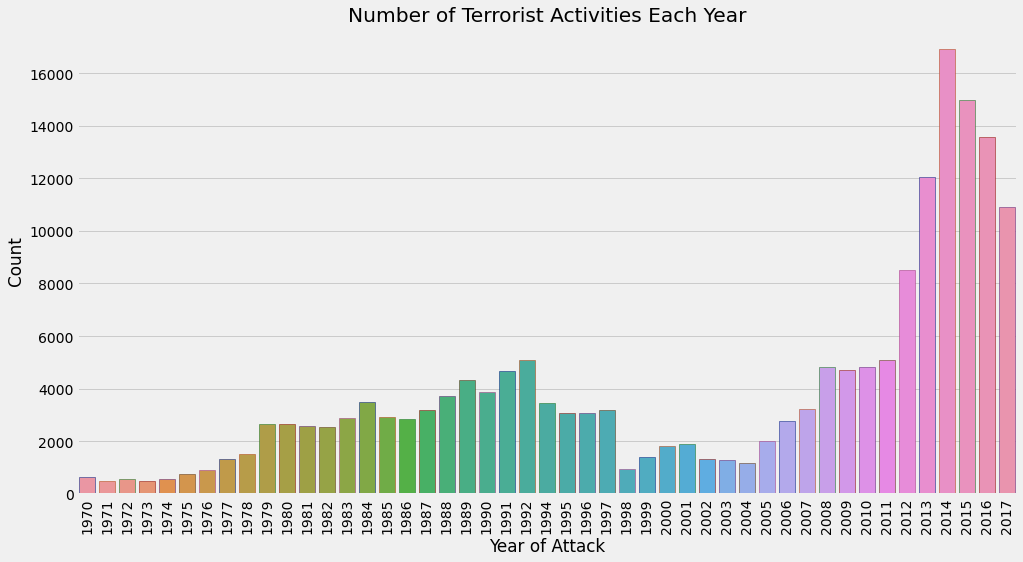

In [ ]:
plt.subplots(figsize = (15, 8))
sns.countplot('Year', data = df, edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.xlabel("Year of Attack")
plt.ylabel("Count")
plt.title("Number of Terrorist Activities Each Year")
plt.show()

From the above graph, its very clear that the global terrorist activities hit a lowest point at the end of 19th century. But all of a sudden, it hiked to a wooping 18,000 mark in 2014.

We need to ask why terrorism raised after 2000. There may be various reasons for this that may not be available in the dataset.

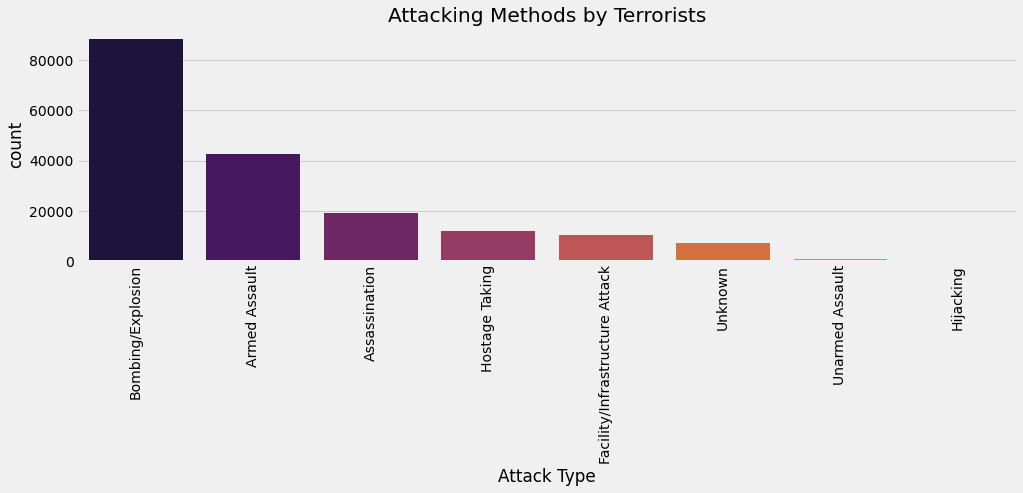

In [ ]:
plt.subplots(figsize = (15, 4))
sns.countplot('AttackType', data = df, palette = 'inferno', order = df['AttackType'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

In [ ]:
# Create table_1 about Attack types and number of Dead/Injured People

cat = ['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking', 'Facility/Infrastructure Attack']
color_cat = sns.color_palette("Set2", 8)[:5]
color_cat_dict = dict(zip(cat, color_cat))

table_1 = df[['AttackType','Casualities']].groupby('AttackType', as_index = False).sum().sort_values(by = 'Casualities', ascending = False)
table_1 = table_1.reset_index()

inci = [88255,42669,7276,19312,12149,659,1015,10356]
table_1["Incidents"] = np.array(inci)

table_1["Casuality_Rate"] = table_1["Casualities"]/table_1["Incidents"]
table_1

index                      AttackType  Casualities  Incidents  \
0      2               Bombing/Explosion     514233.0      88255   
1      0                   Armed Assault     212386.0      42669   
2      7                         Unknown      39606.0       7276   
3      1                   Assassination      37209.0      19312   
4      5                  Hostage Taking      27732.0      12149   
5      4                       Hijacking      20642.0        659   
6      6                 Unarmed Assault      14791.0       1015   
7      3  Facility/Infrastructure Attack       6293.0      10356   

   Casuality_Rate  
0        5.826673  
1        4.977525  
2        5.443375  
3        1.926729  
4        2.282657  
5       31.323217  
6       14.572414  
7        0.607667

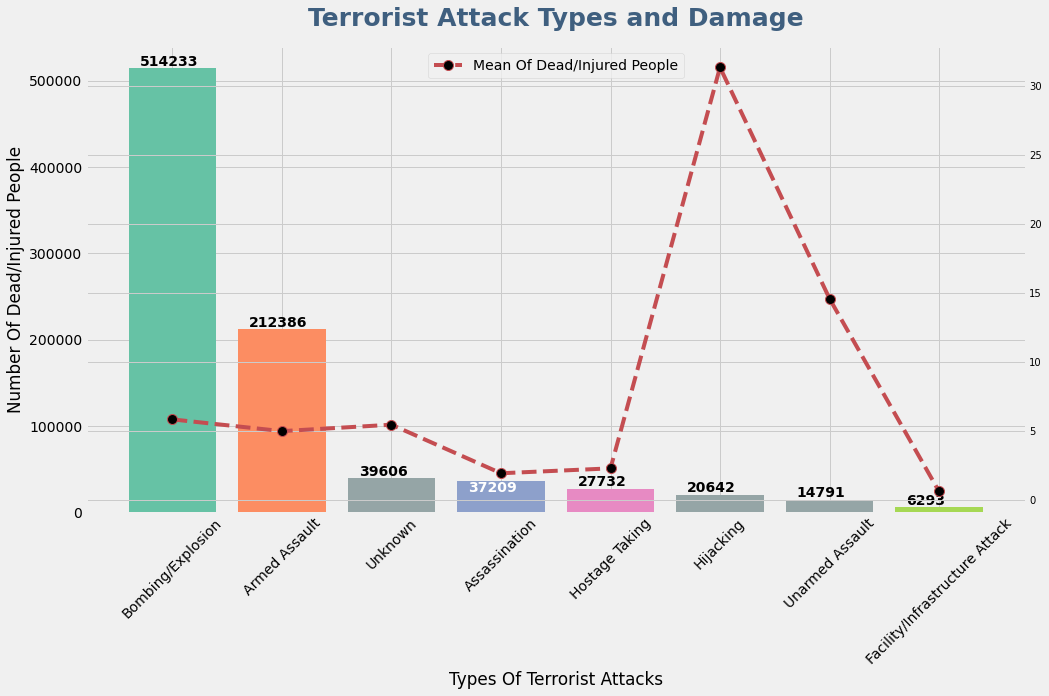

In [ ]:
# Draw chart of Terrorist Attack Types and the Damage
labels = table_1['AttackType'].tolist()
x = np.arange(len(labels)) 
cas = table_1['Casualities'].tolist()

gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
color_list = [color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray for ter_type in labels]

c_rate = table_1["Casuality_Rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(labels, cas,
       color = color_list,
       align = 'center')

# Number in bar chart
for i,v in enumerate(cas):
    ax1.text(i - 0.3, v - 13000 if v == 37209 else v + 3000, str(round(v)), 
             color = 'w' if v == 37209 else 'k',
             fontweight = 'bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(labels, c_rate, linestyle = '--', linewidth = 4, marker = 'o', 
         markerfacecolor = 'black', markersize = 10,
         label = 'Mean Of Dead/Injured People',
         color = '#C44D51')

plt.title('Terrorist Attack Types and Damage', fontsize = 25, pad = 20, weight = 'bold', 
             color = sns.cubehelix_palette(8, start = .5, rot = -.75)[-3]) 

ax1.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(labels, rotation = 45)

plt.yticks(fontsize = 10)

ax2.legend(loc = 'upper center') 
fig.show()

From this, we can say that even though the frequency of "Hijacking" less compared to others, but the Casuality Rate is way to high w.r.t the trend for other terrorist activities.

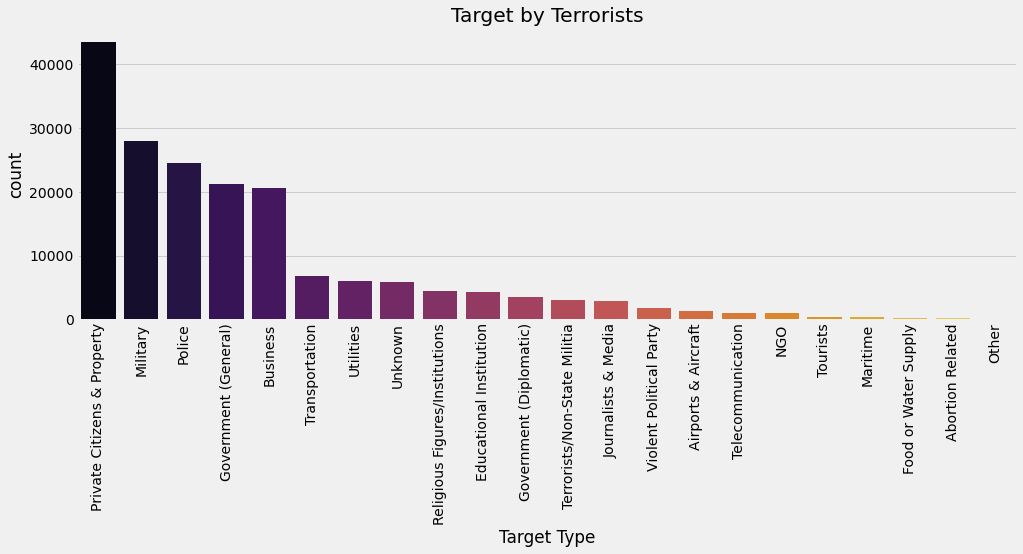

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot('TargType',data = df, palette = 'inferno', order = df['TargType'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

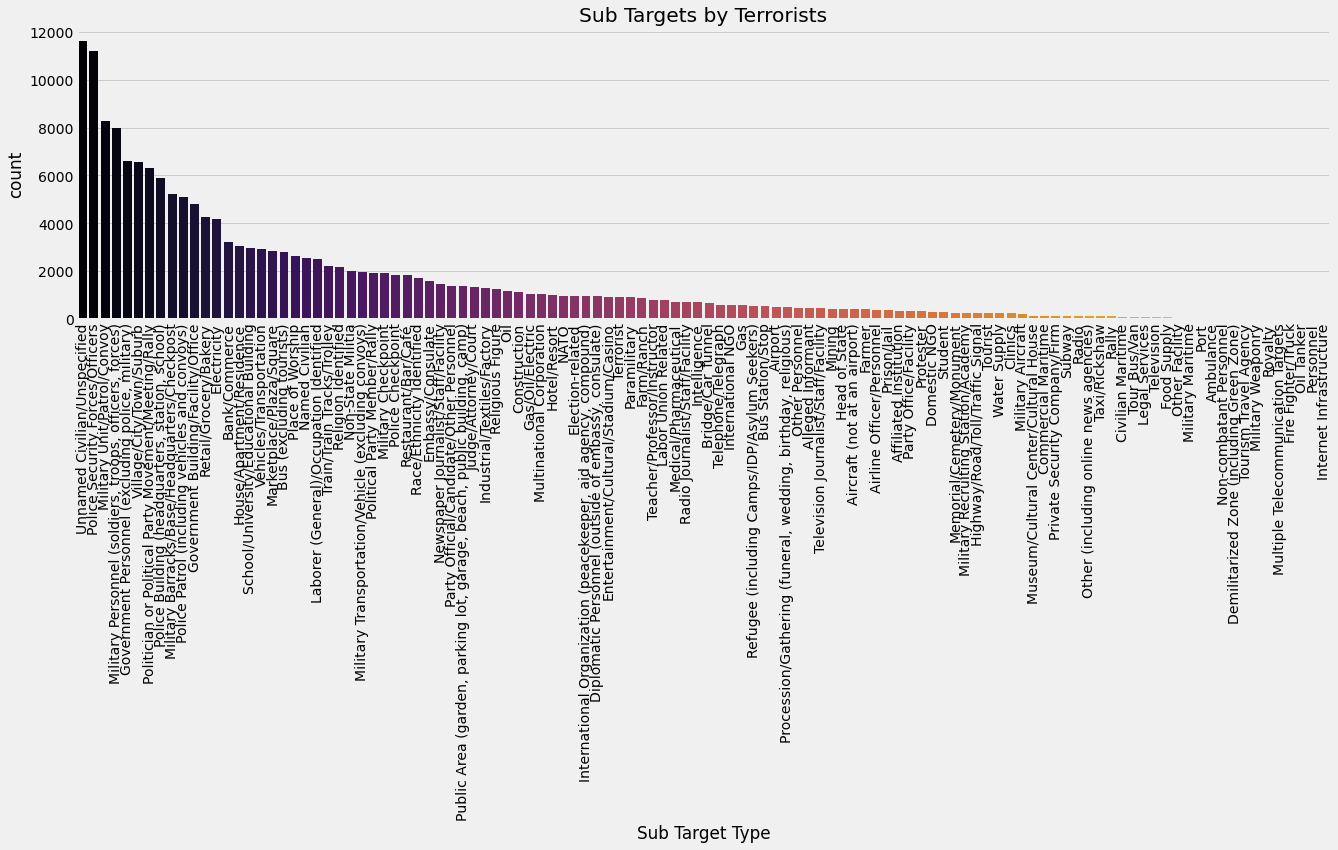

In [ ]:
plt.subplots(figsize = (20,5))
sns.countplot('TargSubType', data = df, palette = 'inferno', order = df['TargSubType'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Sub Target Type')
plt.title('Sub Targets by Terrorists')
plt.show()

In [ ]:
print("The top sub targets of terrorists are:", df['TargSubType'].value_counts().index[:5])

The top sub targets of terrorists are: Index(['Unnamed Civilian/Unspecified', 'Police Security Forces/Officers',
       'Military Unit/Patrol/Convoy',
       'Military Personnel (soldiers, troops, officers, forces)',
       'Government Personnel (excluding police, military)'],
      dtype='object')


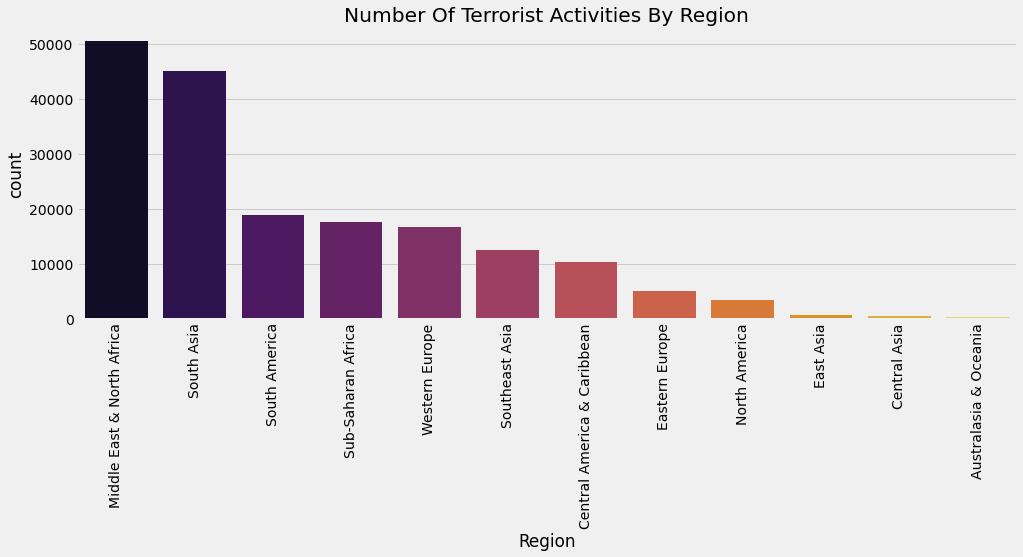

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot('Region', data = df, palette = 'inferno', order = df['Region'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

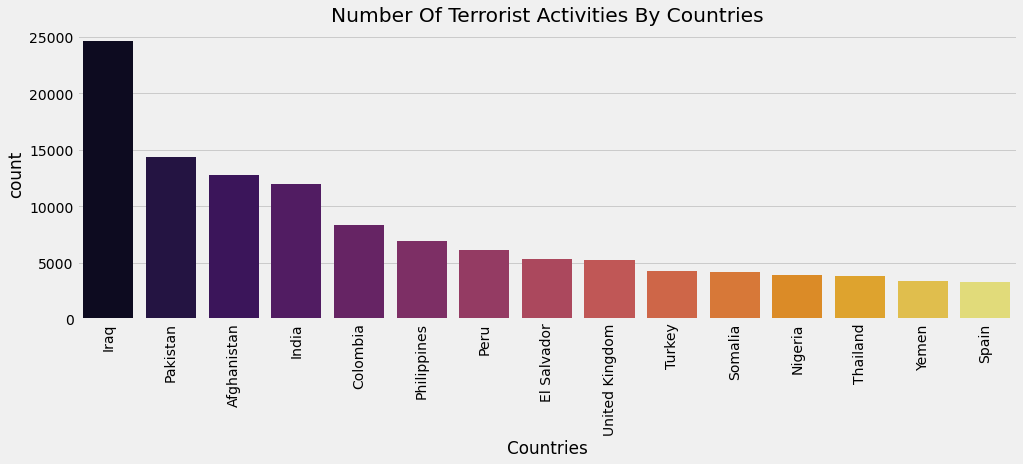

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot('Country', data = df, palette = 'inferno', order = df['Country'].value_counts()[:15].index)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.title('Number Of Terrorist Activities By Countries')
plt.show()

Plotting the locations where the terrorist attacks claimed lesser than 100 casualities :

In [ ]:
df['casualities'] = df['Killed'] + df['Wounded']

Text(0.5, 1.0, 'Terroist attacks with lesser than 100 casualities')

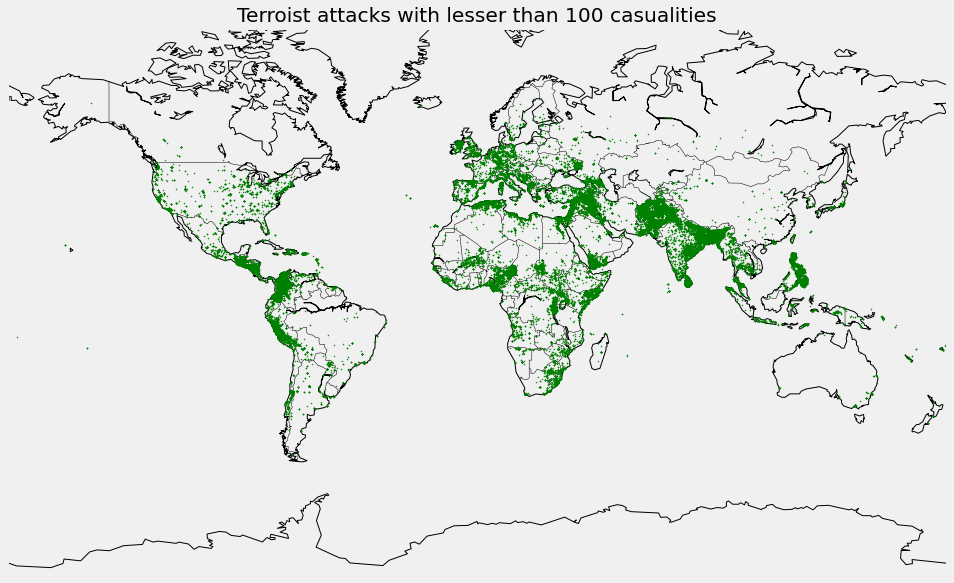

In [ ]:
m1 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)
lat_100 = list(df[df['casualities'] < 100].latitude)
long_100 = list(df[df['casualities'] < 100].longitude)
x_100,y_100 = m1(long_100, lat_100)
m1.drawcoastlines()
m1.drawcountries()
m1.plot(x_100, y_100, 'go', markersize = 0.5, color = 'g')
fig=plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Terroist attacks with lesser than 100 casualities")

From the above map, India, Middle east and European countries are the favorite targets of the terrorist groups.

Plotting the locations where the terrorist attacks claimed more than 100 casualities :

Text(0.5, 1.0, 'Terroist attacks with more than 100 Casualities')

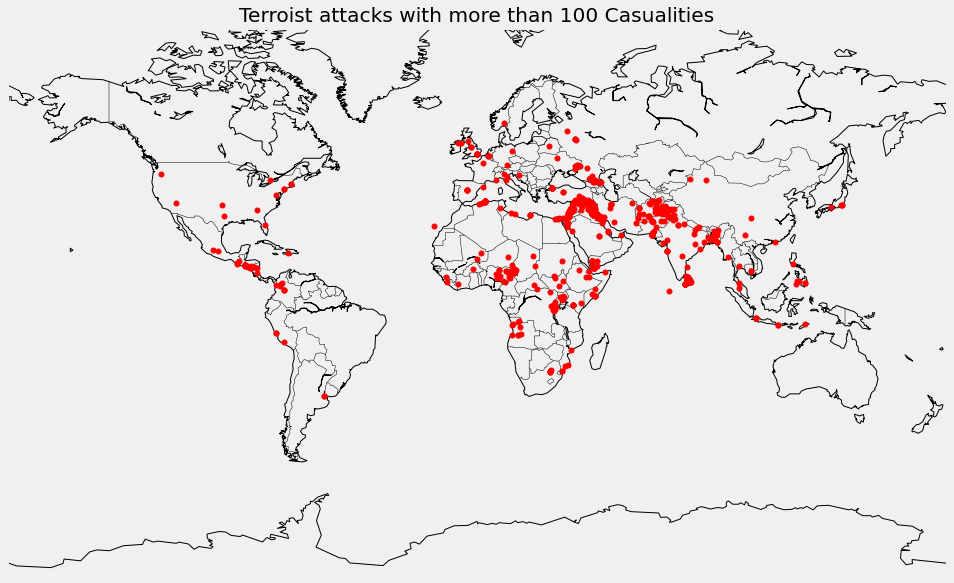

In [ ]:
m2 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)
lat_100 = list(df[df['casualities'] >= 100].latitude)
long_100 = list(df[df['casualities'] >= 100].longitude)
x_100,y_100 = m2(long_100, lat_100)
m2.drawcoastlines()
m2.drawcountries()
m2.plot(x_100, y_100, 'go', markersize = 5, color = 'r')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Terroist attacks with more than 100 Casualities")

Most of the major attacks were also happened in Middle east and contries like Pakistan, Afganisthan etc.

Which regions are facing more terrorist attacks worldwide :  

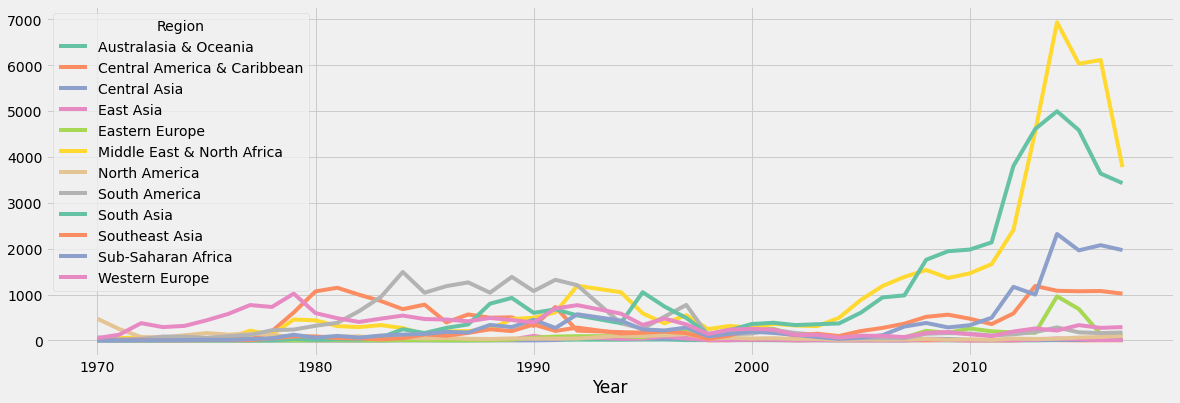

In [ ]:
df_region = pd.crosstab(df.Year,df.Region)
df_region.plot(color = sns.color_palette('Set2', 12))
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.show()

Middle East, North Africa, South Asia are the top most affected regions by terrorism. In this chart also we can see a complete drop in the global terrorism rate at the end of 19th century. 

But after that, there was a sudden hike in the terrorism worldwide. So its very clear that something that happened around this time led to this hike. What was that ?

**9/11 attack ?**

Lets analyse which type of attack is famous in every region :

In [ ]:
df_type = pd.crosstab(df.Region,df.AttackType)
df_type

AttackType                   Armed Assault  Assassination  Bombing/Explosion  \
Region                                                                         
Australasia & Oceania                   51             36                 75   
Central America & Caribbean           4361           1254               3239   
Central Asia                           116            115                235   
East Asia                              117             55                330   
Eastern Europe                        1274            400               2766   
Middle East & North Africa            9273           4206              30908   
North America                          448            255               1534   
South America                         3875           2745               9039   
South Asia                           11404           4301              21246   
Southeast Asia                        4022           1369               4818   
Sub-Saharan Africa                    6004           1638               5557   
Western Europe                        1724           2938               8508   

AttackType                   Facility/Infrastructure Attack  Hijacking  \
Region                                                                   
Australasia & Oceania                                    71          3   
Central America & Caribbean                             403         26   
Central Asia                                             20          8   
East Asia                                               200         18   
Eastern Europe                                          260         26   
Middle East & North Africa                             1115        138   
North America                                           906         18   
South America                                           803         67   
South Asia                                             2189         93   
Southeast Asia                                          948         59   
Sub-Saharan Africa                                      810        136   
Western Europe                                         2631         67   

AttackType                   Hostage Taking  Unarmed Assault  Unknown  
Region                                                                 
Australasia & Oceania                    19               11       16  
Central America & Caribbean             688               19      354  
Central Asia                             47                5       17  
East Asia                                17               42       23  
Eastern Europe                          241               62      115  
Middle East & North Africa             2766              177     1891  
North America                           190               73       32  
South America                          1648               47      754  
South Asia                             3397              323     2021  
Southeast Asia                          811               25      433  
Sub-Saharan Africa                     1967               83     1355  
Western Europe                          358              148      265

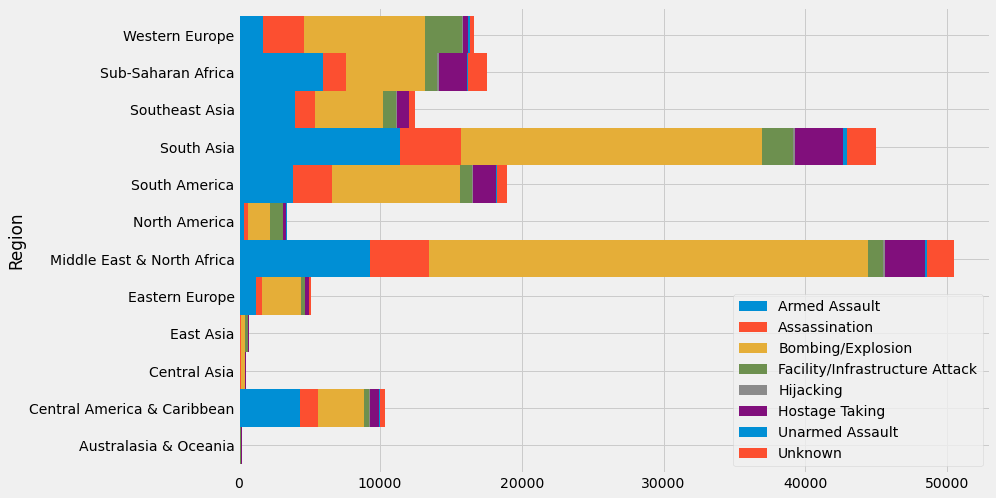

In [ ]:
df_type.plot.barh(stacked = True, width = 1)
fig = plt.gcf()
fig.set_size_inches(12 ,8)
plt.legend(loc = 4)
plt.show()

Frrom the chart above, it is clear that bombing and explosion is the favourite attack of terrorist groups in every region.

This may be the reason why most number of civilians are killed in the attacks as a single explosion claims lots of lives.

What are the top most affected countries from terrorism worl wide :

In [ ]:
# Top 20 countries affected by terrorism
count_df=df['Country'].value_counts()[:20].to_frame() # to_frame() function will generate a dataframe out of the results. 
count_df.columns=['Attacks']
count_df

Attacks
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479

Lets mix and match the features and see if we get any insights out of it :

We are going to plot number of attacks and number of casualities in a bar chat for every significant country :

In [ ]:
# This will give the number of people killed in every country collectively
count_kill=df.groupby('Country')['Killed'].sum().to_frame() 
count_kill.head ()

Killed
Country             
Afghanistan  39384.0
Albania         42.0
Algeria      11066.0
Andorra          0.0
Angola        3043.0

In [ ]:
# This will merge the count_df and count_kill datasets 
# and give top 20 countries with no of attacks and no of people killed 
attack_kill = count_df.merge(count_kill, left_index = True, right_index = True, how = 'left')
attack_kill

Attacks   Killed
Iraq              24636  78589.0
Pakistan          14368  23822.0
Afghanistan       12731  39384.0
India             11960  19341.0
Colombia           8306  14698.0
Philippines        6908   9559.0
Peru               6096  12771.0
El Salvador        5320  12053.0
United Kingdom     5235   3410.0
Turkey             4292   6888.0
Somalia            4142  10273.0
Nigeria            3907  22682.0
Thailand           3849   2742.0
Yemen              3347   8776.0
Spain              3249   1288.0
Sri Lanka          3022  15530.0
United States      2836   3771.0
Algeria            2743  11066.0
France             2693    534.0
Egypt              2479   3869.0

Lets plot both of these datasets in a single barchat :

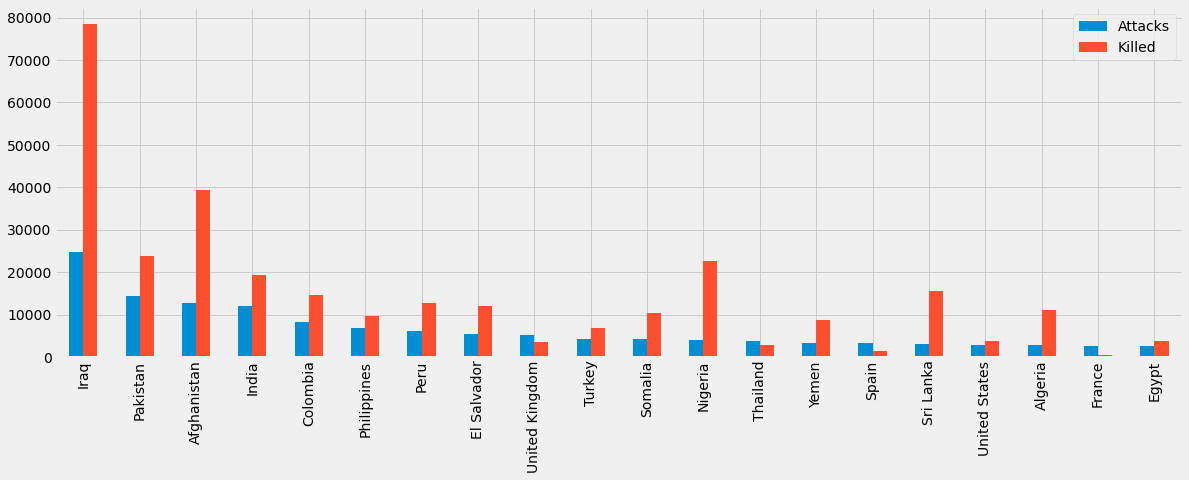

In [ ]:
# Plotting the same on a bar chart
attack_kill.plot.bar()
fig = plt.gcf()
fig.set_size_inches(18, 6)

From the above chart, we can come to some obvious conclusions :
* In some of the Middle east contries like Iraq, number of casualities is more than twice the number of attacks. High density of population may be the reason. Poor prevention and security may also be a reason for this.
* In developed contries like UK, Spain, France, no of attacks is more than the number of casulaities. This means that these contries are better is safety and they are good in prevention before a terror attack happens. Low population density may also be a reason for this.

Which terror groups are highly active?

In [ ]:
# To find which terrorist group is most active
count_group = df['Group'].value_counts()[:20].to_frame()
count_group

Group
Unknown                                           82782
Taliban                                            7478
Islamic State of Iraq and the Levant (ISIL)        5613
Shining Path (SL)                                  4555
Farabundo Marti National Liberation Front (FMLN)   3351
Al-Shabaab                                         3288
New People's Army (NPA)                            2772
Irish Republican Army (IRA)                        2671
Revolutionary Armed Forces of Colombia (FARC)      2487
Boko Haram                                         2418
Kurdistan Workers' Party (PKK)                     2310
Basque Fatherland and Freedom (ETA)                2024
Communist Party of India - Maoist (CPI-Maoist)     1878
Maoists                                            1630
Liberation Tigers of Tamil Eelam (LTTE)            1606
National Liberation Army of Colombia (ELN)         1561
Tehrik-i-Taliban Pakistan (TTP)                    1351
Palestinians                                       1125
Houthi extremists (Ansar Allah)                    1062
Al-Qaida in the Arabian Peninsula (AQAP)           1020

Text(0.5, 1.0, 'Most active terrorist groups')

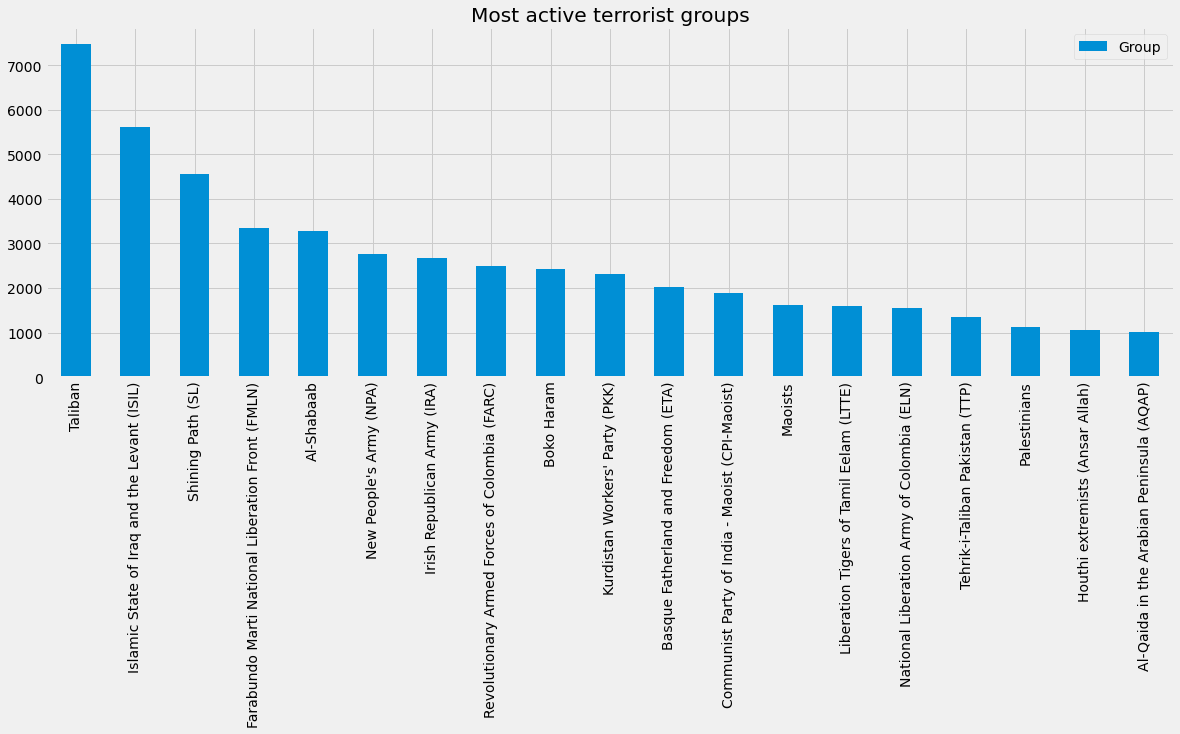

In [ ]:
count_group[1:20].plot.bar()
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.title("Most active terrorist groups")

Plotting th activities of top 10 groups in a time series plot :

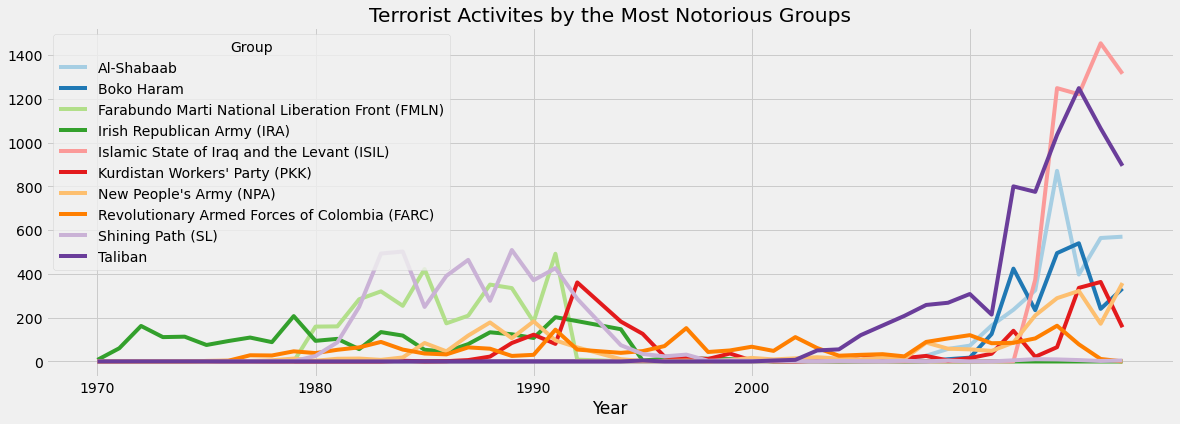

In [ ]:
top_groups10 = df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
noto_grp = pd.crosstab(top_groups10.Year, top_groups10.Group)
noto_grp.plot(color = sns.color_palette('Paired', 10))
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.title("Terrorist Activites by the Most Notorious Groups")
plt.show()

The above chart clearly shows that all the terror groups are active for some particular time and stopped their activities after some time before 2000. But after 2000, we can see lot of groups emerging.

We can ask questions like what happened after the year 2000 ? What is the moto for these groups ? Is somebody creating these groups and funding them for their own goodwill ?

Most notorious groups like Taliban, ISIS emerged after 2000.

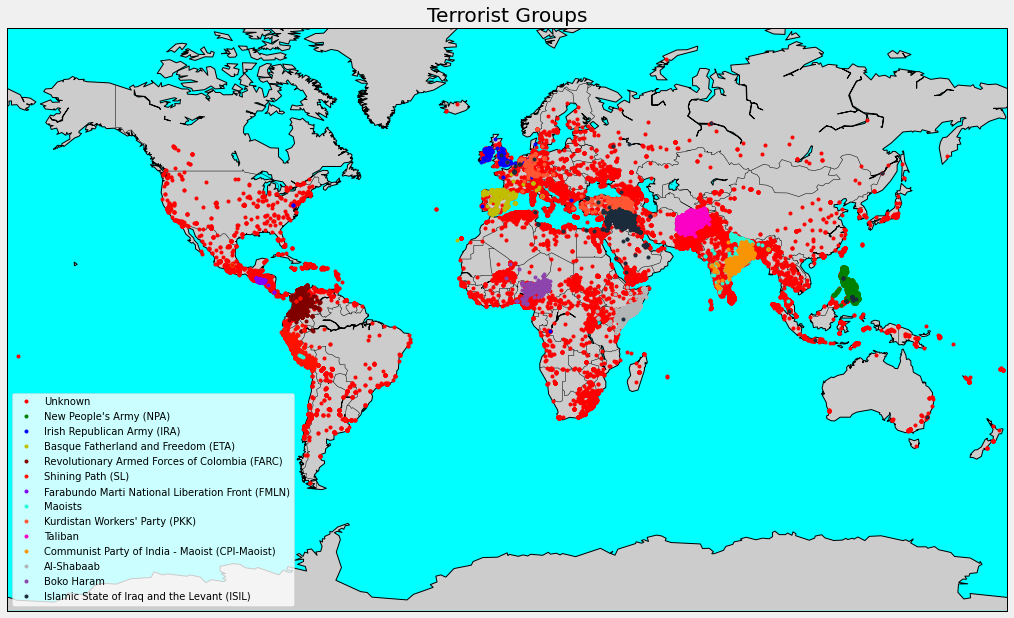

In [ ]:
groups = df[df['Group'].isin(df['Group'].value_counts()[:14].index)]
m3 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, lat_ts = 20, resolution = 'c', lat_0 = True, lat_1 = True)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color =  'aqua')
m3.drawmapboundary(fill_color = 'aqua')
fig = plt.gcf()
fig.set_size_inches(22, 10)
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']
group = list(groups['Group'].unique())
def group_point(group, color, label):
    lat_group = list(groups[groups['Group'] == group].latitude)
    long_group = list(groups[groups['Group'] == group].longitude)
    x_group, y_group = m3(long_group, lat_group)
    m3.plot(x_group,y_group, 'go', markersize = 3, color = j, label = i)
for i,j in zip(group,colors):
    group_point(i, j, i)
legend = plt.legend(loc = 'lower left', frameon = True, prop = {'size' : 10})
frame = legend.get_frame()
frame.set_facecolor('white')
plt.title('Terrorist Groups')
plt.show()

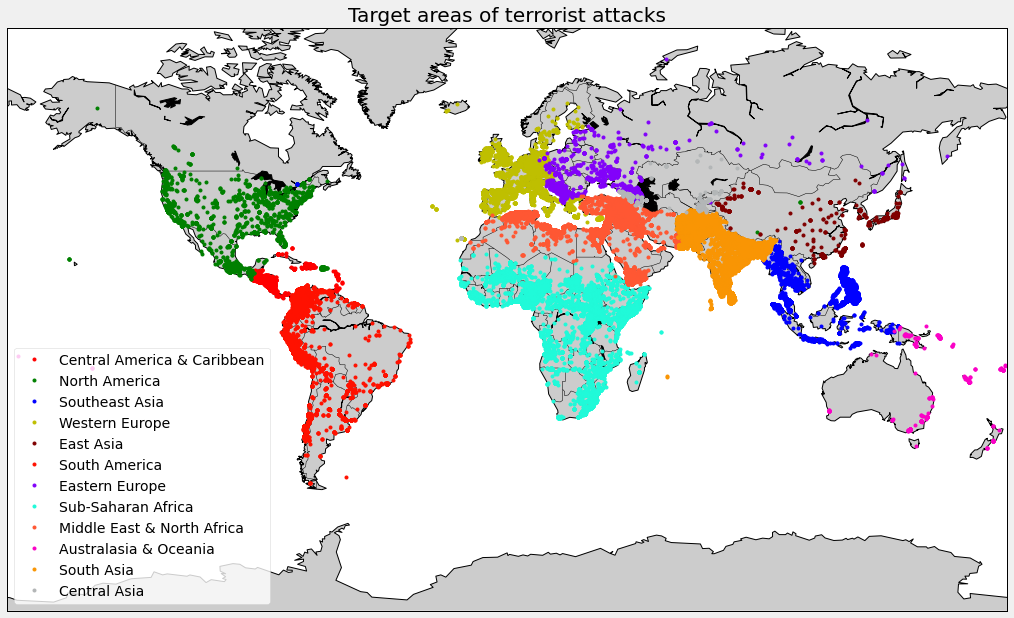

In [ ]:
groups = df[df['Region'].isin(df['Region'].value_counts()[:14].index)]
m4 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, lat_ts = 20, resolution = 'c', lat_0 = True, lat_1 = True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color = 'black')
m4.drawmapboundary(fill_color = 'white')
fig = plt.gcf()
fig.set_size_inches(22, 10)
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']
group = list(groups['Region'].unique())
def group_point(group, color, label):
    lat_group = list(groups[groups['Region'] == group].latitude)
    long_group = list(groups[groups['Region'] == group].longitude)
    x_group, y_group =  m4(long_group,lat_group)
    m4.plot(x_group, y_group, 'go', markersize = 3, color = j, label = i)
for i,j in zip(group, colors):
    group_point(i, j, i)
legend = plt.legend(loc = 'lower left', frameon = True, prop = {'size' : 14})
frame = legend.get_frame()
frame.set_facecolor('white')
plt.title('Target areas of terrorist attacks')
plt.show()

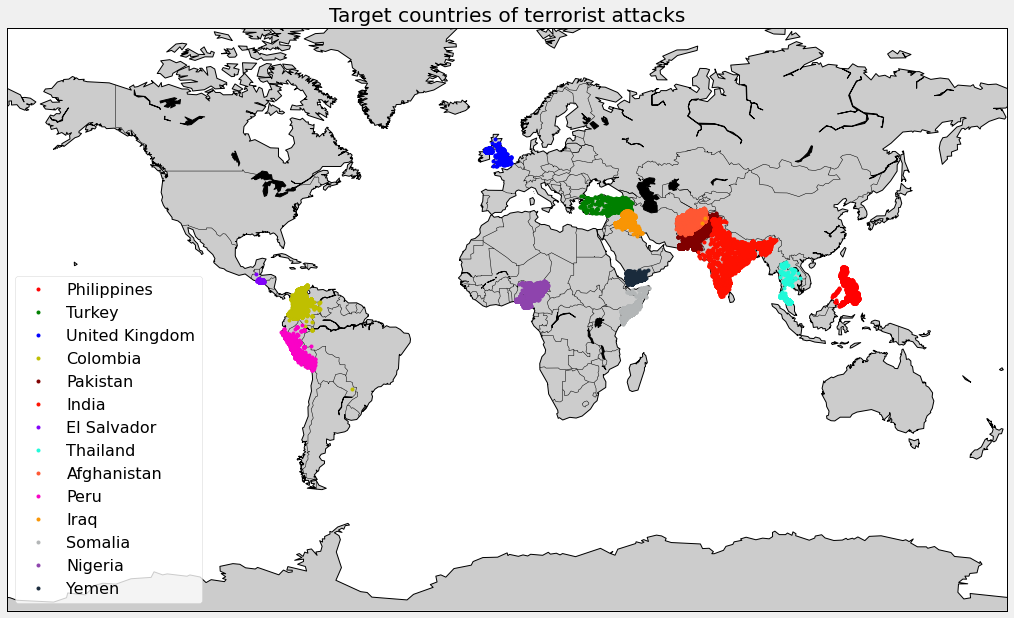

In [ ]:
groups = df[df['Country'].isin(df['Country'].value_counts()[:14].index)]
m5 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, lat_ts = 20, resolution = 'c', lat_0 =  True, lat_1 = True)
m5.drawcoastlines()
m5.drawcountries()
m5.fillcontinents(lake_color = 'black')
m5.drawmapboundary(fill_color = 'white')
fig = plt.gcf()
fig.set_size_inches(22, 10)
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']
group = list(groups['Country'].unique())
def group_point(group, color, label):
    lat_group = list(groups[groups['Country'] == group].latitude)
    long_group = list(groups[groups['Country'] == group].longitude)
    x_group, y_group = m5(long_group, lat_group)
    m5.plot(x_group, y_group, 'go', markersize = 3, color = j, label = i)
for i,j in zip(group, colors):
    group_point(i, j, i)
legend = plt.legend(loc = 'lower left', frameon = True, prop = {'size' : 16})
frame = legend.get_frame()
frame.set_facecolor('white')
plt.title('Target countries of terrorist attacks')
plt.show()


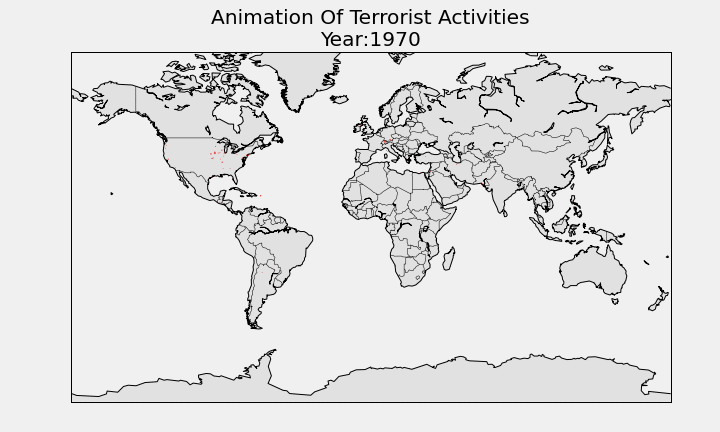

In [ ]:
fig = plt.figure(figsize = (10, 6))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities' + '\n' + 'Year:' +str(Year))
    m6 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, lat_ts = 20, resolution = 'c')
    lat6 = list(df[df['Year'] == Year].latitude)
    long6 = list(df[df['Year'] == Year].longitude)
    x6, y6 = m6(long6, lat6)
    m6.scatter(x6, y6, s = [(kill + wound) *  0.1 for kill, wound in zip(df[df['Year'] == Year].Killed, df[df['Year'] == Year].Wounded)], color = 'r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1, alpha = 0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig, animate, list(df.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer = 'imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data = '''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

Lets plot the terrorist activities in India :

In [ ]:
df_india = df[df['Country'] == 'India']
df_india.head()

EventId  Year Country      Region   latitude  longitude  \
1186  197202220004  1972   India  South Asia  28.585836  77.153336   
2764  197501190004  1975   India  South Asia  25.863042  85.781004   
3857  197605260001  1976   India  South Asia  28.585836  77.153336   
5327  197709280004  1977   India  South Asia  19.075984  72.877656   
7337  197901130004  1979   India  South Asia  26.200605  92.937574   

        Provstate        City  Crit1  Crit2  ...  \
1186        Delhi   New Delhi      1      1  ...   
2764        Bihar  Samastipur      1      1  ...   
3857        Delhi   New Delhi      1      1  ...   
5327  Maharashtra      Bombay      1      1  ...   
7337        Assam     Unknown      1      1  ...   

                                            TargSubType  Nationality  \
1186                       Aircraft (not at an airport)      Germany   
2764  Government Personnel (excluding police, military)        India   
3857                                            Airport        India   
5327                       Aircraft (not at an airport)        Japan   
7337     Police Patrol (including vehicles and convoys)        India   

                        Group GunCertain1 Claimed  WeaponType Killed Wounded  \
1186             Palestinians         0.0     NaN  Explosives    0.0     0.0   
2764             Ananda Marga         1.0     0.0  Explosives    4.0     0.0   
3857                  Unknown         0.0     NaN  Explosives    0.0     0.0   
5327  Japanese Red Army (JRA)         0.0     NaN    Firearms    0.0     0.0   
7337              Naga People         0.0     NaN    Firearms    NaN     NaN   

      Casualities  casualities  
1186          0.0          0.0  
2764          4.0          4.0  
3857          0.0          0.0  
5327          0.0          0.0  
7337          NaN          NaN  

[5 rows x 25 columns]

Attacks with lesser than 100 casualities in India:

[]

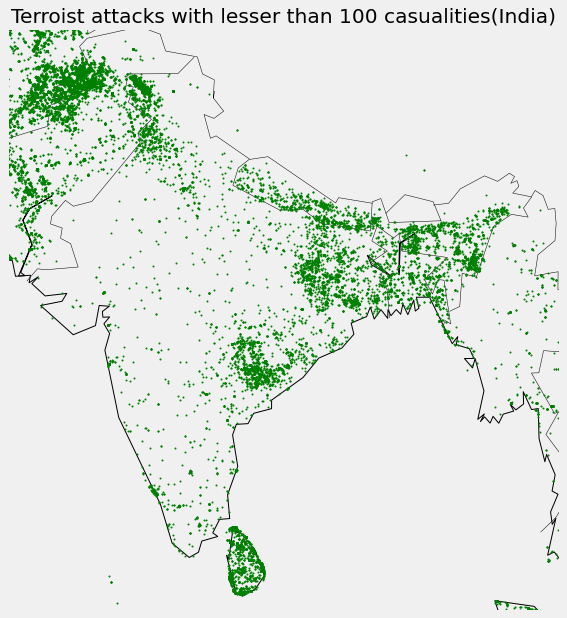

In [ ]:
mi1 = Basemap(projection = 'mill', llcrnrlat = 5, urcrnrlat = 37, llcrnrlon = 67, urcrnrlon = 99)
lat_100 = list(df[df['casualities'] < 100].latitude)
long_100 = list(df[df['casualities'] < 100].longitude)
x_100, y_100 = mi1(long_100, lat_100)
mi1.drawcoastlines()
mi1.drawcountries()
mi1.plot(x_100, y_100, 'go', markersize = 1, color = 'g')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Terroist attacks with lesser than 100 casualities(India)")
plt.plot()

It is clear from the above map that states like Andhra, Bihar, Orissa and J&K are the most affected states from terrorism. Presence of Naxals is one of the main reason for this.

Attacks with more than 100 casualities :

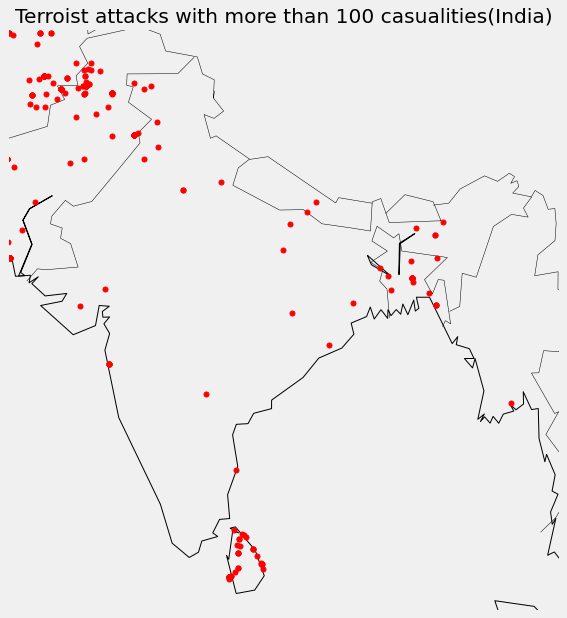

In [ ]:
mi2 = Basemap(projection = 'mill', llcrnrlat = 5, urcrnrlat = 37, llcrnrlon = 67, urcrnrlon = 99)
lat_100 = list(df[df['casualities'] >= 100].latitude)
long_100 = list(df[df['casualities'] >= 100].longitude)
x_100, y_100 = mi2(long_100, lat_100)
mi2.drawcoastlines()
mi2.drawcountries()
mi2.plot(x_100, y_100, 'go', markersize = 5, color = 'r')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Terroist attacks with more than 100 casualities(India)")
plt.show()